In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from langdetect import detect
import seaborn as sns

# Import files

In [124]:
coursera_courses = pd.read_csv("./Datasets/Moocs/Coursera_courses.csv")
print(coursera_courses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB
None


In [125]:
coursera_reviews = pd.read_csv("./Datasets/Moocs/Coursera_reviews.csv")
print(coursera_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB
None


# Check for duplicates

In [126]:
# Load the coursera_courses dataframe
coursera_courses = pd.read_csv("./Datasets/Moocs/Coursera_courses.csv")

# Check for duplicates in coursera_courses dataframe
print("Duplicates in Coursera_courses:", coursera_courses.duplicated().sum())

# Load the coursera_reviews dataframe
coursera_reviews = pd.read_csv("./Datasets/Moocs/Coursera_reviews.csv")

# Check for duplicates in coursera_reviews dataframe
print("Duplicates in Coursera_reviews:", coursera_reviews.duplicated().sum())

Duplicates in Coursera_courses: 0
Duplicates in Coursera_reviews: 934764


# Check duplicates in cursera_curses by "curse_id"

In [127]:
# Check for duplicates in "coursera_courses" based on "course_id" column
duplicates_courses = coursera_courses.duplicated(subset='course_id')
print("Number of duplicate rows in coursera_courses based on course_id: ", duplicates_courses.sum())

Number of duplicate rows in coursera_courses based on course_id:  0


# Check duplicates in cursera_reviews by "curse_id", "reviews" and "reviewers"

In [128]:
# Check for duplicates in "coursera_reviews" based on "course_id", "review", and "reviewers" columns
duplicates_reviews = coursera_reviews.duplicated(subset=['course_id', 'reviews', 'reviewers'])
print("Number of duplicate rows in coursera_reviews based on course_id, reviews, and reviewers: ", duplicates_reviews.sum())

Number of duplicate rows in coursera_reviews based on course_id, reviews, and reviewers:  934783


# Add the column "num_reviews" as a way of counting how many times a course has been reviewed

In [129]:
coursera_reviews['num_reviews'] = coursera_reviews.groupby('course_id')['course_id'].transform('count')

In [130]:
# Drop duplicates in "coursera_reviews" based on "course_id", "reviews", and "reviewers" columns
coursera_reviews = coursera_reviews.drop_duplicates(subset=['course_id', 'reviews', 'reviewers'])

In [131]:
# Print for checking info
print(coursera_reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519928 entries, 0 to 1454644
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       519872 non-null  object
 1   reviewers     519928 non-null  object
 2   date_reviews  519928 non-null  object
 3   rating        519928 non-null  int64 
 4   course_id     519928 non-null  object
 5   num_reviews   519928 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 27.8+ MB
None


### Now drop duplicates by "curse_id" keeping the unique values that are representative of the avrg. rating takinng the most recent value for date

In [132]:
# Group the dataframe by course_id and calculate the mean rating for each group
mean_ratings = coursera_reviews.groupby('course_id')['rating'].mean()

# Create a new column 'mean_rating' in cursera_reviews that contains the mean rating for each course
coursera_reviews['mean_rating'] = coursera_reviews['course_id'].map(mean_ratings)

# Create a new column 'rating_diff' that contains the difference between the rating and the mean rating for each row
coursera_reviews['rating_diff'] = abs(coursera_reviews['rating'] - coursera_reviews['mean_rating'])

#### Sort the dataframe by course_id and date_reviews
coursera_reviews = coursera_reviews.sort_values(by=['course_id', 'date_reviews'], ascending=[True, False])

#### Drop duplicates of unique values in the column "course_id"
coursera_reviews = coursera_reviews.drop_duplicates(subset='course_id', keep='first')

In [133]:
# Print for checking info
print(coursera_reviews.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 1090514 to 1095185
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews       604 non-null    object 
 1   reviewers     604 non-null    object 
 2   date_reviews  604 non-null    object 
 3   rating        604 non-null    int64  
 4   course_id     604 non-null    object 
 5   num_reviews   604 non-null    int64  
 6   mean_rating   604 non-null    float64
 7   rating_diff   604 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 42.5+ KB
None


In [134]:
# Print for checking
print(coursera_reviews)

                                                   reviews         reviewers  \
1090514  The course provided a new perspective on the n...      By Richard J   
1010142  기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
1321571       Excellent thoughts and concepts presented.    By Shivanand R K   
1354666  This is just a basic Python programming course...   By Truong T T H   
1340862  Fue un curso muy padre y entendible para cualq...       By Brenda I   
...                                                    ...               ...   
496790   Learnt so much on this subject! Amazing course...       By Benita A   
1215743                                   great experience    By GAYATRI S T   
1240690  It is a course which teaches you punctuality, ...         By Ayan C   
1009877  Leaves you better than you began. Thank you, P...      By SHANIYA B   
1095185  An excellent course that provides the most imp...        By Bryan C   

         date_reviews  rating  \
109051

# Creation a new dataframe to usea "reviews" and "course_id" to fill the new column "language"

In [135]:
# Creating a new dataframe with required columns
columns = ["course_id", "reviews", "language"]
course_id_df = pd.DataFrame(columns=columns)

# Filling the dataframe with course_id and index_number
course_id_df["course_id"] = coursera_reviews["course_id"]

# Filling the dataframe with course_id and index_number
course_id_df["reviews"] = coursera_reviews["reviews"]

# Saving the dataframe as a csv file
course_id_df.to_csv("./Datasets/auxi/coursera_reviews_language_empty.csv", index=False)

# Using library langdetect to fill the column "language"

In [136]:
# Read the CSV file with the merged data
language_prediction = pd.read_csv('./Datasets/auxi/coursera_reviews_language_empty.csv')

# Create an empty list to store the language of each course
languages = []

# Iterate over the rows in the 'reviews' column of the merged dataframe
for review in language_prediction['reviews']:
    try:
        # Detect the language of the text in the 'reviews' column
        language = detect(review)
        languages.append(language)
    except:
        languages.append(None)

# Add the list of languages as a new column to the dataframe
language_prediction['language'] = languages

# Save the dataframe to a new csv
language_prediction.to_csv('./Datasets/auxi/file_with_course_id_reviews_language.csv', index=False)

# After using langdetct library and cleaning manuali the missing values and librery mistakes import the laguage data

In [137]:
coursera_language_data = pd.read_csv("./Datasets/auxi/coursera_reviews_language_filled.csv")
print(coursera_language_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   course_id  604 non-null    object
 1   reviews    604 non-null    object
 2   language   604 non-null    object
dtypes: object(3)
memory usage: 14.3+ KB
None


# Now merge the "coursera:reviews" with "coursera_laguage_data" dataframes

In [138]:
merged_df = pd.merge(coursera_reviews, coursera_language_data, on='course_id')
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews_x     604 non-null    object 
 1   reviewers     604 non-null    object 
 2   date_reviews  604 non-null    object 
 3   rating        604 non-null    int64  
 4   course_id     604 non-null    object 
 5   num_reviews   604 non-null    int64  
 6   mean_rating   604 non-null    float64
 7   rating_diff   604 non-null    float64
 8   reviews_y     604 non-null    object 
 9   language      604 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 51.9+ KB
None


In [139]:
print(merged_df)

                                             reviews_x         reviewers  \
0    The course provided a new perspective on the n...      By Richard J   
1    기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
2         Excellent thoughts and concepts presented.    By Shivanand R K   
3    This is just a basic Python programming course...   By Truong T T H   
4    Fue un curso muy padre y entendible para cualq...       By Brenda I   
..                                                 ...               ...   
599  Learnt so much on this subject! Amazing course...       By Benita A   
600                                   great experience    By GAYATRI S T   
601  It is a course which teaches you punctuality, ...         By Ayan C   
602  Leaves you better than you began. Thank you, P...      By SHANIYA B   
603  An excellent course that provides the most imp...        By Bryan C   

     date_reviews  rating                                          course_id  \
0    Se

# now Merging the "merged_df" with "coursera_courses"

In [140]:
final_df = pd.merge(merged_df, coursera_courses, on='course_id', how='left')
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reviews_x     604 non-null    object 
 1   reviewers     604 non-null    object 
 2   date_reviews  604 non-null    object 
 3   rating        604 non-null    int64  
 4   course_id     604 non-null    object 
 5   num_reviews   604 non-null    int64  
 6   mean_rating   604 non-null    float64
 7   rating_diff   604 non-null    float64
 8   reviews_y     604 non-null    object 
 9   language      604 non-null    object 
 10  name          604 non-null    object 
 11  institution   604 non-null    object 
 12  course_url    604 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 66.1+ KB
None


In [141]:
print(final_df)

                                             reviews_x         reviewers  \
0    The course provided a new perspective on the n...      By Richard J   
1    기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
2         Excellent thoughts and concepts presented.    By Shivanand R K   
3    This is just a basic Python programming course...   By Truong T T H   
4    Fue un curso muy padre y entendible para cualq...       By Brenda I   
..                                                 ...               ...   
599  Learnt so much on this subject! Amazing course...       By Benita A   
600                                   great experience    By GAYATRI S T   
601  It is a course which teaches you punctuality, ...         By Ayan C   
602  Leaves you better than you began. Thank you, P...      By SHANIYA B   
603  An excellent course that provides the most imp...        By Bryan C   

     date_reviews  rating                                          course_id  \
0    Se

## final_df normalization

### Droping the extra columns

In [142]:
final_df = final_df.drop(['mean_rating', 'rating_diff', 'reviews_y'], axis=1)

### renaming "reviews_x" as "reviews"

In [143]:
final_df = final_df.rename(columns={'reviews_x': 'reviews'})

# Checking info and print

In [144]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 604 entries, 0 to 603
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviews       604 non-null    object
 1   reviewers     604 non-null    object
 2   date_reviews  604 non-null    object
 3   rating        604 non-null    int64 
 4   course_id     604 non-null    object
 5   num_reviews   604 non-null    int64 
 6   language      604 non-null    object
 7   name          604 non-null    object
 8   institution   604 non-null    object
 9   course_url    604 non-null    object
dtypes: int64(2), object(8)
memory usage: 51.9+ KB
None


In [145]:
print(final_df)

                                               reviews         reviewers  \
0    The course provided a new perspective on the n...      By Richard J   
1    기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
2         Excellent thoughts and concepts presented.    By Shivanand R K   
3    This is just a basic Python programming course...   By Truong T T H   
4    Fue un curso muy padre y entendible para cualq...       By Brenda I   
..                                                 ...               ...   
599  Learnt so much on this subject! Amazing course...       By Benita A   
600                                   great experience    By GAYATRI S T   
601  It is a course which teaches you punctuality, ...         By Ayan C   
602  Leaves you better than you began. Thank you, P...      By SHANIYA B   
603  An excellent course that provides the most imp...        By Bryan C   

     date_reviews  rating                                          course_id  \
0    Se

### Normalization for the dtype of "final_df" columns

In [146]:
# Transform the "reviews" column to string type
final_df['reviews'] = final_df['reviews'].astype(str)

# Transform the "reviewers" column to string type
final_df['reviewers'] = final_df['reviewers'].astype(str)

# Transform the "date_reviews" column to datetime type
final_df['date_reviews'] = pd.to_datetime(final_df['date_reviews'])

# Transform the "course_id" column to string type
final_df['course_id'] = final_df['course_id'].astype(str)

# Transform the "language" column to string type
final_df['language'] = final_df['language'].astype(str)

# Transform the "name" column to string type
final_df['name'] = final_df['name'].astype(str)

# Transform the "institution" column to string type
final_df['institution'] = final_df['institution'].astype(str)

# Transform the "course_url" column to string type
final_df['course_url'] = final_df['course_url'].astype(str)


# Ploting a heatmap to se correlations

C:\Users\miauchis\AppData\Local\Temp\ipykernel_8952\2353783392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df.corr()


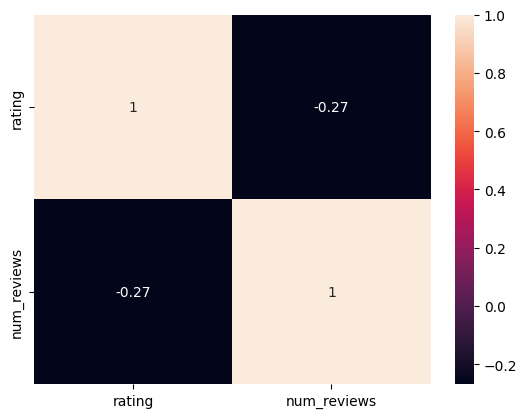

In [149]:
# Create a correlation matrix
corr = final_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True)

# Show the plot
plt.show()

# Creating pivot table for rating and num_reviews

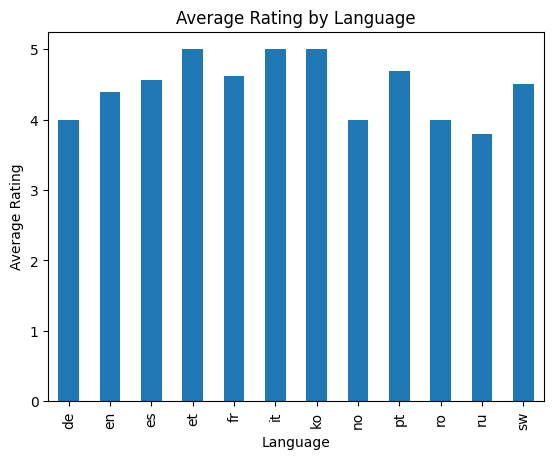

In [150]:
# Create a pivot table with average rating by language
pivot_df = final_df.pivot_table(index='language', values='rating', aggfunc='mean')

# Plot a bar chart of average rating by language
pivot_df.plot(kind='bar', legend=None)
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.title('Average Rating by Language')
plt.show()


In [151]:
pivot_table = final_df.pivot_table(index='institution', values='rating', aggfunc='mean')

<Figure size 30000x1000 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

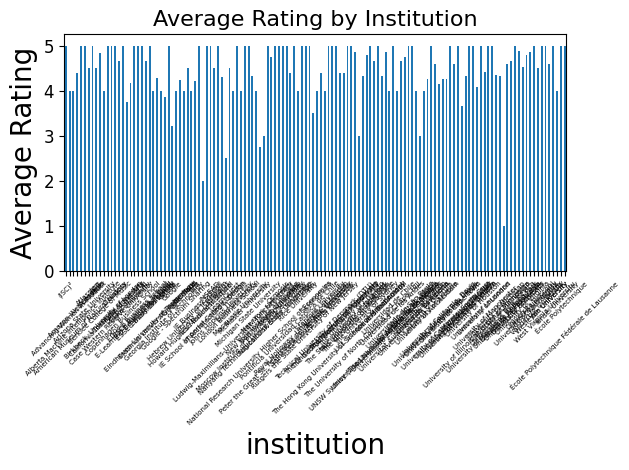

In [176]:
plt.figure(figsize=(300, 10))
fig = plt.figure(figsize=(10,5))
pivot_table.plot(kind='bar', legend=None, fontsize=12)
plt.xlabel('institution', fontsize=20)
plt.ylabel('Average Rating', fontsize=20)
plt.title('Average Rating by Institution', fontsize=16)
plt.xticks(fontsize=5) # modify the font size of the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

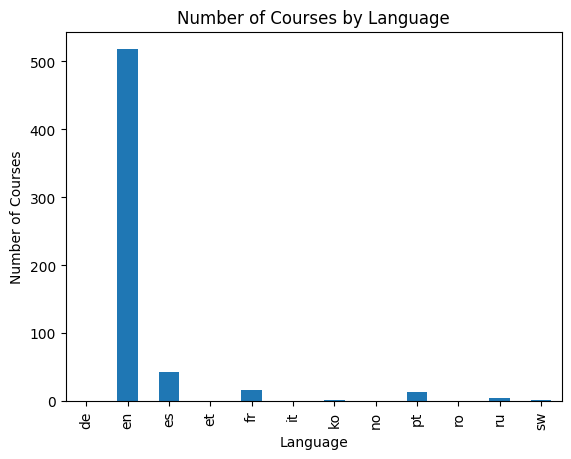

In [177]:
pivot_table = final_df.pivot_table(values='course_id', index='language', aggfunc='count')
pivot_table.plot(kind='bar', legend=None)
plt.xlabel('Language')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Language')
plt.show()


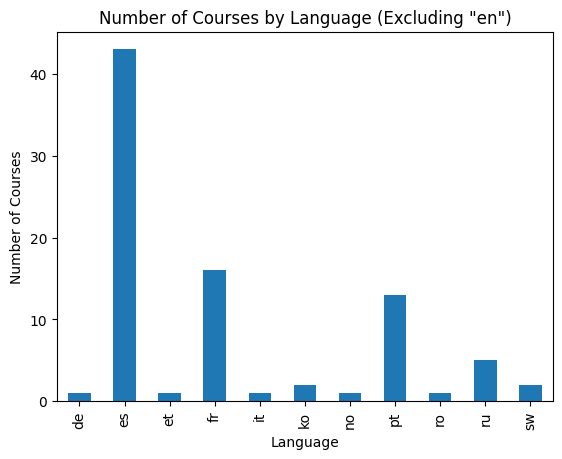

In [179]:
# Filter out the "en" value
pivot_table = final_df[final_df["language"] != "en"].pivot_table(values='course_id', index='language', aggfunc='count')

# Plot the bar chart
pivot_table.plot(kind='bar', legend=None)
plt.xlabel('Language')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Language (Excluding "en")')
plt.show()


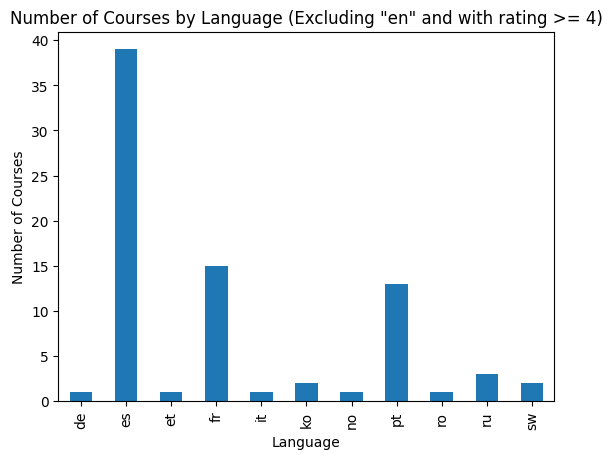

In [180]:
# Filter out the "en" value and rating >=4
pivot_table = final_df[(final_df["language"] != "en") & (final_df["rating"] >= 4)].pivot_table(values='course_id', index='language', aggfunc='count')

# Plot the bar chart
pivot_table.plot(kind='bar', legend=None)
plt.xlabel('Language')
plt.ylabel('Number of Courses')
plt.title('Number of Courses by Language (Excluding "en" and with rating >= 4)')
plt.show()


In [181]:
most_loved_courses_no_en = final_df[(final_df["rating"] >= 4) & (final_df["language"] != "en")]
pivot_table = most_loved_courses_no_en.pivot_table(values='course_id', index='language', aggfunc='count')


In [182]:
print(most_loved_courses_no_en.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 1 to 575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   reviews       79 non-null     object        
 1   reviewers     79 non-null     object        
 2   date_reviews  79 non-null     datetime64[ns]
 3   rating        79 non-null     int64         
 4   course_id     79 non-null     object        
 5   num_reviews   79 non-null     int64         
 6   language      79 non-null     object        
 7   name          79 non-null     object        
 8   institution   79 non-null     object        
 9   course_url    79 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 6.8+ KB
None


In [183]:
print(most_loved_courses_no_en)

                                               reviews         reviewers  \
1    기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
4    Fue un curso muy padre y entendible para cualq...       By Brenda I   
6                               An exceptional course.   By MILLOT J M F   
16          Excelente, sin dudas lo volvería a elegir!        By Mafer M   
19   Un curso muy enriquecedor y que concientiza a ...  By Morales M L E   
..                                                 ...               ...   
539                                     Exelente curso       By Andres A   
543  Excelente.Estar al día en Autismo es fundament...   By fernando g u   
552  Про Agile я слышал много информации, просматри...       By Anatol K   
568     Muito bom, bem completo e com muita informação        By Laura G   
575                                 Excellent course.      By Kristīne B   

    date_reviews  rating                                    course_id  \
1     2019-09-

In [184]:
most_loved_courses = final_df[(final_df["rating"] >= 4) & (final_df["language"])]
pivot_table = most_loved_courses.pivot_table(values='course_id', index='language', aggfunc='count')

In [185]:
print(most_loved_courses.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 603
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   reviews       530 non-null    object        
 1   reviewers     530 non-null    object        
 2   date_reviews  530 non-null    datetime64[ns]
 3   rating        530 non-null    int64         
 4   course_id     530 non-null    object        
 5   num_reviews   530 non-null    int64         
 6   language      530 non-null    object        
 7   name          530 non-null    object        
 8   institution   530 non-null    object        
 9   course_url    530 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 45.5+ KB
None


In [186]:
print(most_loved_courses)

                                               reviews         reviewers  \
0    The course provided a new perspective on the n...      By Richard J   
1    기업에서 관리되는 접근제어 방식 중 다양한 모델과 장치들을 알게 되었습니다. 초심자...       By PUREUM W   
2         Excellent thoughts and concepts presented.    By Shivanand R K   
4    Fue un curso muy padre y entendible para cualq...       By Brenda I   
6                               An exceptional course.   By MILLOT J M F   
..                                                 ...               ...   
599  Learnt so much on this subject! Amazing course...       By Benita A   
600                                   great experience    By GAYATRI S T   
601  It is a course which teaches you punctuality, ...         By Ayan C   
602  Leaves you better than you began. Thank you, P...      By SHANIYA B   
603  An excellent course that provides the most imp...        By Bryan C   

    date_reviews  rating                                          course_id  \
0     20